In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
big_df = pd.read_csv('all_props_cleaned_petite.csv')
big_df.head()

,V,Thrust,diameter,pitch,rpm
0,0.0,0.032,10.5,4.5,1000.0
1,0.2,0.032,10.5,4.5,1000.0
2,0.4,0.031,10.5,4.5,1000.0
3,0.7,0.031,10.5,4.5,1000.0
4,0.9,0.030,10.5,4.5,1000.0


In [36]:
import tensorflow as tf

In [37]:
dataset = big_df.copy()
dataset.tail()

,V,Thrust,diameter,pitch,rpm
293474,191.0,4.365,9.0,9.0,21000.0
293475,198.7,3.338,9.0,9.0,21000.0
293476,206.3,2.277,9.0,9.0,21000.0
293477,214.0,1.189,9.0,9.0,21000.0
293478,221.6,0.009,9.0,9.0,21000.0


In [38]:
dataset.isna().sum()

V           0
Thrust      1
diameter    0
pitch       0
rpm         0
dtype: int64

In [39]:
dataset = dataset.dropna()

In [40]:
dataset.isna().sum()

V           0
Thrust      0
diameter    0
pitch       0
rpm         0
dtype: int64

In [41]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()

,V,Thrust,diameter,pitch,rpm
128473,68.4,34.477,20.00,14.00,9000.0
216443,89.8,5.334,7.00,5.00,26000.0
153175,217.4,1.552,4.75,4.75,43000.0
101545,59.9,19.442,16.00,4.00,15000.0
207862,85.6,1.142,7.80,7.00,13000.0


In [42]:
train_labels = train_dataset.pop('Thrust')
test_labels = test_dataset.pop('Thrust')
train_dataset.head()

,V,diameter,pitch,rpm
112269,39.3,18.1,10.0,5000.0
201258,5.3,7.4,7.6,18000.0
185035,51.3,6.5,3.7,17000.0
129423,33.9,20.0,15.0,9000.0
13743,26.3,10.0,8.0,20000.0


In [43]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
V,234782.0,49.707743,45.637459,-42.0,13.6,36.20,73.8,319.6
diameter,234782.0,10.523603,4.487367,4.0,7.0,9.25,13.5,27.0
pitch,234782.0,7.308001,3.348207,2.0,4.5,6.50,10.0,22.5
rpm,234782.0,12508.699700,9050.014395,1000.0,6000.0,11000.00,17000.0,45000.0


In [44]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head()

,V,diameter,pitch,rpm
112269,-0.228053,1.688384,0.804012,-0.829689
201258,-0.973055,-0.696088,0.087211,0.606773
185035,0.034889,-0.896651,-1.077592,0.496275
129423,-0.346376,2.111795,2.297349,-0.387701
13743,-0.512906,-0.116684,0.206678,0.827767


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                320       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [46]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 53ms/step


array([[0.28601655],
       [0.06307764],
       [0.20255467],
       [0.5436908 ],
       [0.03222061],
       [0.0578262 ],
       [0.16012466],
       [0.21638502],
       [0.02870721],
       [0.03727667]], dtype=float32)

In [47]:
EPOCHS = 100
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1)

Epoch 1/100
5870/5870 [==============================] - 8s 1ms/step - loss: 3.8241 - mae: 0.9291 - mse: 3.8241 - val_loss: 1.7910 - val_mae: 0.6887 - val_mse: 1.7910
Epoch 2/100
5870/5870 [==============================] - 8s 1ms/step - loss: 1.7023 - mae: 0.6902 - mse: 1.7023 - val_loss: 1.8213 - val_mae: 0.6996 - val_mse: 1.8213
Epoch 3/100
5870/5870 [==============================] - 9s 2ms/step - loss: 1.6129 - mae: 0.6645 - mse: 1.6129 - val_loss: 1.4562 - val_mae: 0.6141 - val_mse: 1.4562
Epoch 4/100
5870/5870 [==============================] - 9s 2ms/step - loss: 1.5284 - mae: 0.6389 - mse: 1.5284 - val_loss: 1.4496 - val_mae: 0.6064 - val_mse: 1.4496
Epoch 5/100
5870/5870 [==============================] - 9s 2ms/step - loss: 1.4852 - mae: 0.6246 - mse: 1.4852 - val_loss: 1.5369 - val_mae: 0.6310 - val_mse: 1.5369
Epoch 6/100
5870/5870 [==============================] - 9s 2ms/step - loss: 1.4304 - mae: 0.6076 - mse: 1.4304 - val_loss: 1.8112 - val_mae: 0.6306 - val_mse: 1.811

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.794744,0.431479,0.794744,0.877213,0.438943,0.877213,95
96,0.788915,0.430634,0.788915,0.883020,0.441914,0.883020,96
97,0.786653,0.429629,0.786653,0.911817,0.452199,0.911817,97
98,0.786509,0.429498,0.786509,0.870002,0.449934,0.870002,98
99,0.781300,0.428124,0.781300,0.916428,0.468532,0.916428,99


KeyError: 'mean_absolute_error'

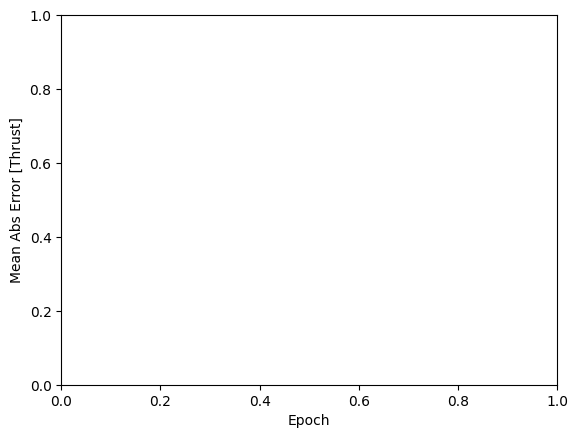

In [51]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Thrust]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Thrust^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    



plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} Thrust".format(mae))

58696/58696 - 1s - loss: 0.6664 - mean_absolute_error: 0.3915 - mean_squared_error: 0.6664
Testing set Mean Abs Error:  0.39 Thrust


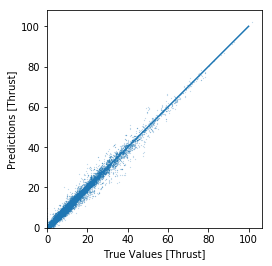

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions, s=0.01)
plt.xlabel('True Values [Thrust]')
plt.ylabel('Predictions [Thrust]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
# plt.xlim([0,0.5])
# plt.ylim([0,0.5])
_ = plt.plot([-100, 100], [-100, 100])

####  Error Distribution

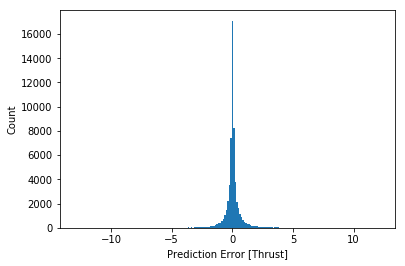

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 200)
plt.xlabel("Prediction Error [Thrust]")
_ = plt.ylabel("Count")

## <center>Some Test Cases</center>

In [ ]:
input_df = pd.DataFrame([14.3,10.5,4.5,3000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 0.096

      V  diameter  pitch     rpm
0  14.3      10.5    4.5  3000.0
          V  diameter     pitch       rpm
0 -0.775848  -0.00526 -0.838658 -1.050683


array([[0.15609908]], dtype=float32)

In [ ]:
input_df = pd.DataFrame([27.6,5.5,4.5,37000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 5.112

      V  diameter  pitch      rpm
0  27.6       5.5    4.5  37000.0
          V  diameter     pitch       rpm
0 -0.484421 -1.119499 -0.838658  2.706217


array([[5.7114153]], dtype=float32)

In [ ]:
input_df = pd.DataFrame([54.1,8.5,7,13000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 2.442

      V  diameter  pitch      rpm
0  54.1       8.5    7.0  13000.0
          V  diameter    pitch       rpm
0  0.096242 -0.450955 -0.09199  0.054287


array([[2.2381108]], dtype=float32)

In [ ]:
input_df = pd.DataFrame([20.1,11,7,6000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 1.558

      V  diameter  pitch     rpm
0  20.1      11.0    7.0  6000.0
         V  diameter    pitch       rpm
0 -0.64876  0.106164 -0.09199 -0.719192


array([[1.9325039]], dtype=float32)

## <center>GUI</center>

Prop is available in dataset
only one prop


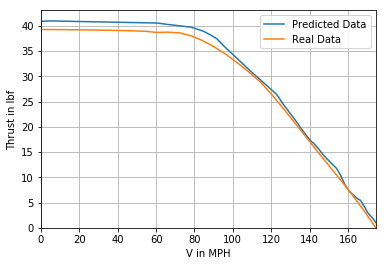

In [ ]:
diam = 16
pitch = 10
rpm = 13999
V_values = list(np.linspace(0,200,num=800))

# Predicted Data:
T_values = []
for V_value in V_values:
    input_df = pd.DataFrame([V_value,diam,pitch,rpm]).T
    input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
#     print(input_df)
#     print(norm(input_df))
    T_values.append(model.predict(norm(input_df))[0][0])
    
plt.plot(V_values, T_values, label='Predicted Data')

# Real Data:
prop_df = dataset.loc[dataset['diameter'] == diam].loc[dataset['pitch'] == pitch].loc[dataset['rpm'] == rpm]
if prop_df.shape[0] > 3:    # prop is available in the dataset
    print('Prop is available in dataset')
    if prop_df.loc[prop_df['V'] == 0].index.shape[0] > 1:    # if there are multiple similar props
        V_real = prop_df['V'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        T_real = prop_df['Thrust'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        print('multiple props')
    else:    # Only one prop
        V_real = prop_df['V']
        T_real = prop_df['Thrust']
        print('only one prop')

    plt.plot(V_real, T_real, label='Real Data')
    plt.xlim([0,V_real.iloc[-1]])
else:
    print('Prop not available in dataset')


plt.ylim([0,plt.ylim()[1]])
plt.xlabel('V in MPH')
plt.ylabel('Thrust in lbf')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('Fitting_model.h5')